# INTRODUCTION TO NLP

1. Bag of words.
2. Count Vectorizer.
3. Tokenization.
4. Stopwords.
5. Stemming and Lemmatization.
6. Vector Similarity
7. TF-IDF

In [1]:
# Standard imports
import numpy as np
from pprint import pprint
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engine
from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
    OneHotEncoder,
)

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Custom imports

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Any
import logging
import warnings

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure warnings and pther settings
warnings.filterwarnings("ignore")
sns.set()


def load_data(*, filename: str) -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.

    Returns:
        df (pd.DataFrame): The loaded dataframe.
    """
    df = pd.read_csv(filename)
    print(f"Shape of df: {df.shape}\n")
    return df

### Implement Count Vectorizer

In [3]:
# Load data
bbc_data = load_data(filename="../../data/bbc_text_cls.csv")

bbc_data.head()

Shape of df: (2225, 2)



,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet bus...",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of th...",business
2,"Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.\n\nState-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft's purchase of Yugansk would include such obligations. ""The pledged assets are wit...",business
3,"High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by £106m or 47.3%. BA's profits were still better than market expectation of £59m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surchar...",business
4,"Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target. Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%. Pernod said it was seeking acquisitions but refused to comment on specifics.\n\nPernod's last major purchase was a third of US giant Seagram in 2000, the move whic...",business


In [4]:
def count_vectorizer(*, text=list[str]) -> dict:
    """This is used to return the count of words in a list.

    Params:
        text (list[str]): List of text.

    Returns:
        count_dict (dict): A dict containing the counts of the unique words.
    """
    from collections import Counter

    # Select the text at index 0. Convert to a list of words.
    count_dict = Counter(text)
    return count_dict

In [5]:
text = bbc_data["text"].iat[10].split()
text[:2]

['Ask', 'Jeeves']

In [6]:
count_vectorizer(text=text)

Counter({'Ask': 4,
         'Jeeves': 3,
         'tips': 1,
         'online': 4,
         'ad': 1,
         'revival': 2,
         'has': 2,
         'become': 1,
         'the': 11,
         'third': 1,
         'leading': 2,
         'search': 1,
         'firm': 1,
         'this': 1,
         'week': 1,
         'to': 3,
         'thank': 1,
         'a': 4,
         'in': 6,
         'internet': 1,
         'advertising': 1,
         'for': 3,
         'improving': 1,
         'fortunes.': 1,
         'The': 2,
         "firm's": 1,
         'revenue': 1,
         'nearly': 1,
         'tripled': 1,
         'fourth': 1,
         'quarter': 2,
         'of': 5,
         '2004,': 1,
         'exceeding': 1,
         '$86m': 1,
         '(£46m).': 1,
         'Jeeves,': 1,
         'once': 1,
         'among': 1,
         'best-known': 1,
         'names': 1,
         'on': 3,
         'web,': 1,
         'is': 1,
         'now': 1,
         'relatively': 2,
         'modest': 1,


## Tokenization

During processing, `spaCy` first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language.

In [7]:
# Tokenize
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Good morning. Welcome to another great day."
doc = nlp(text)


for token in doc:
    print(token.text)

Good
morning
.
Welcome
to
another
great
day
.


In [8]:
# Check for missing values
bbc_data.isna().sum()

text      0
labels    0
dtype: int64

In [9]:
# Target
TARGET = "labels"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = bbc_data["text"]
y = bbc_data[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((2002,), (223,))

### Stopwords

1. They are ineffective for NLP tasks because they appear in every document and make classification difficult. e.g when building a spam classifier.
2. Stopword removal can potentially help in improving performance, as there are fewer and only significant tokens left. Thus, the classification accuracy could be improved.

### Note

Because stopwords can be application/domain specific, we must exercise caution when removing them.

In [10]:
# Load stopowrds
# stopwords = nlp.Defaults.stop_words

In [11]:
bbc_data[TARGET].value_counts(normalize=True)

sport            0.229663
business         0.229213
politics         0.187416
tech             0.180225
entertainment    0.173483
Name: labels, dtype: float64

### Comment:

1. Check the distribution of the target. This is done inorder to determine whether the labels are `imbalanced` or not.
2. If the labels are imbalanced, e.g if a class has ~**98%** of the labels, it means that a model accuracy of 98% is NOT useful and another metric like roc_auc score should be used.

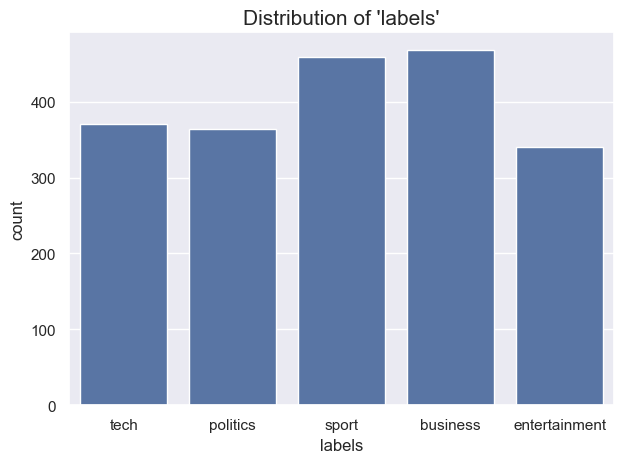

In [12]:
df = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target. It is fairly balanced.
sns.countplot(x=TARGET, data=df, color="b")
plt.title(f"Distribution of {TARGET!r}", size=15)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
# Count the words( vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr  # Sparse matric is used because most of the values in the vector are 0s

<2002x28253 sparse matrix of type '<class 'numpy.int64'>'
	with 405239 stored elements in Compressed Sparse Row format>

In [14]:
(X_tr != 0).sum()  # Sum of values thatis NOT one.

non_zeros = (X_tr != 0).sum()
total_count = np.prod(X_tr.toarray().shape)

# Percentage of non-zero values
non_zeros / total_count

0.0071644456488543845

In [15]:
nb_model = MultinomialNB()

nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Train accuracy: 0.993
Test accuracy: 0.955


In [16]:
# Train a new model by removing the stop words
vectorizer = CountVectorizer(stop_words="english")
# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 27959)
Train accuracy: 0.994
Test accuracy: 0.955


In [17]:
text = X_train.iat[5]
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_)
    break

IAAF IAAF


In [18]:
class LemmaTokenizer:
    """This is used to tokenize and lemmatize a text."""

    def __init__(self) -> None:
        self.nlp = nlp

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        doc = self.nlp(text)  # Tokenize the text
        lemmatized_doc = [token.lemma_ for token in doc]
        return lemmatized_doc


class Tokenizer:
    """This is used to tokenize a text."""

    def __init__(self) -> None:
        self.nlp = nlp

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        doc = self.nlp(text)  # Tokenize the text
        tokenized_doc = [token.text for token in doc]
        return tokenized_doc

In [19]:
l = LemmaTokenizer()
l(text=text)[20:22]

['the', 'International']

In [20]:
t = Tokenizer()
t(text=text)[20:22]

['the', 'International']

In [21]:
# Train a new model with lemmatization. (It takes a while to train)
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 23923)
Train accuracy: 0.992
Test accuracy: 0.960


In [22]:
# Train a new model with using tokenized documents. (Using spaCy)
# It takes a while to train
vectorizer = CountVectorizer(tokenizer=Tokenizer())
# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 29363)
Train accuracy: 0.993
Test accuracy: 0.964


In [23]:
class SimpleTokenizer:
    """This is used to tokenize a text."""

    def __init__(self) -> None:
        pass

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        tokenized_doc = text.split(" ")  # Tokenize the text
        return tokenized_doc

In [24]:
# Train a new model with using tokenized documents.
vectorizer = CountVectorizer(tokenizer=SimpleTokenizer())
# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 63730)
Train accuracy: 0.997
Test accuracy: 0.955


<br>
<hr>

## Euclidean Distance [Wikipedia]([Wikipedia](https://en.wikipedia.org/wiki/Euclidean_distance))

The `Euclidean distance` between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, therefore occasionally being called the Pythagorean distance.

* The larger the distance, the more `dissimilar` the points/words are.

$$
|| x - y ||_2 = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + ... + (x_d - x_d)^2 }
$$

## Cosine Similarity [Wikipedia](https://en.wikipedia.org/wiki/Cosine_similarity)

`Cosine similarity` is a measure of similarity between two sequences of numbers. For defining it, the sequences are viewed as vectors in an inner product space, and the ***cosine similarity is defined as the cosine of the angle between them***, that is, the dot product of the vectors divided by the product of their lengths. 

$$
x^T*y = ||x||_2 * ||y||_2 * cos\theta
$$

$$
cos\theta = \frac{A.B}{||A|| ||B||} = \frac{\sum_{i=1}^n{A_iB_i}}{\sqrt{\sum_{i=1}^n{A_i^2}}\sqrt{\sum_{i=1}^n{B_i^2}}}
$$

It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. The cosine similarity always belongs to the interval 
[-1,1]. i.e `-1` is the minimum value while `1` is the maximum value.

For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1. The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in [0,1]

<br>

## Cosine Distance

$$
\mathbf{Cosine Distance}  = 1 - \mathbf{Cosine Similarity}
$$

* The minimum cosine distance is `0` while the maximum distance is `2`


### Note:

* The `Cosine distance` is not a proper distance metric because it does not have the triangle inequality property.
* It's better to use `Cosine distance` instead od `Euclidean distance`.

<br>


## TF-IDF (Term Frequency Inverse Document Frequency)
The term `Term Frequency Inverse Document Frequency` refers to a numerical statistic that indicates how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. 

The `tf-idf ` value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to account for the fact that some words appear more frequently in general.

### Term Frequency (TF)

Term frequency, `tf(t,d)`, is the relative frequency of term ***`t`*** within document ***`d`***

$$
tf(t,d) = \frac{count of t in d}{number of words in d}
$$

## Document Frequency

`Document Frequency` is the number of documents, `d` in which the term, `t` is present.

```code
df = occurences of t in document
```


## Inverse Document Frequency

Let `N(t)` be the number of documents term `t` appears in. There are a few other issues with the IDF; for example, if the corpus is large, say 100,000,000, the IDF value explodes; to avoid this effect, we take the log of idf.

$$
\mathbf{idf}(t,d) = \log\frac{N}{N(t)}
$$


When a word that is not in the vocab occurs during the query, the ***`document frequency`*** is 0. Because we can't divide by zero, we smooth the value by adding 1 to the denominator.

$$
\mathbf{idf}(t,d) = \log\frac{N}{N(t) + 1}
$$


$$
\mathbf{tfidf}(t,d) =tf(t,d) \times idf(t)
$$





## Exercise

* Build a movie recommender system that recommends the top 5 most similar movies based on a queried movie.
* Hint:
  * Calculate the tfidf value of the queried movie
  * Compute the similarity between the queried movie and all other movies in the DB.
  * Sort by the similarity.
  * Select the top 5 mos similar movie.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


movies_db = load_data(filename="../../data/tmdb_5000_movies.csv")
movies_db.head(1)

Shape of df: (4803, 20)



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [26]:
def extract_values(input_: str) -> str:
    """This returns the extracted values as a string from a list of dict.

    Params:
        input_ (str): A string containing a list of key-value pairs.

    Returns:
        result (str): A string containing the extracted values.
    """
    input_ = json.loads(input_)
    extracted_values = []
    for row in input_:
        val = row.get("name")
        if len(val.split()) == 1:
            extracted_values.append(val)
            # if the val is a 2-word genre i.e "Science Fiction"
        elif len(val.split()) > 1:
            extracted_values.append("".join(val.split()))
    result = " ".join(extracted_values)
    return result


def concat_columns(col_a: str, col_b: str) -> str:
    """This returns a concatenated string.

    Params:
        col_a (str): The 1st column.
        col_b (str): The 2nd column.

    Returns:
        result (str): The concatenated string.
    """
    result = f"{col_a} {col_b}"
    return result

In [27]:
genre = movies_db["genres"].iat[0]
genre

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [28]:
"".join("Science Fiction")

'Science Fiction'

In [29]:
extract_values(input_=genre)

'Action Adventure Fantasy ScienceFiction'

In [30]:
keywords = movies_db["keywords"].iat[0]
keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [31]:
extract_values(input_=keywords)

'cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [32]:
movies = movies_db[["id", "genres", "keywords", "title"]]
movies = movies.assign(
    genres=lambda x: x["genres"].apply(extract_values),
    keywords=lambda x: x["keywords"].apply(extract_values),
)
# Concat the columns
movies["feature"] = movies.apply(
    lambda x: concat_columns(x["genres"], x["keywords"]), axis="columns"
)

movies.head(1)

,id,genres,keywords,title,feature
0,19995,Action Adventure Fantasy ScienceFiction,cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d,Avatar,Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d


In [33]:
X = movies["feature"]
tfidf = TfidfVectorizer(max_features=5_000)
X_tr = tfidf.fit_transform(X)
X_tr.shape

(4803, 5000)

In [34]:
# Swap the indices with the titles.
movie_2_idx = pd.Series(data=movies.index, index=movies["title"])

movie_2_idx.sample(n=10)

title
Machete Kills                     2229
The Cell                          1379
The Lost Boys                     3210
Hot Pursuit                       1432
Saving Mr. Banks                  1386
East Is East                      3924
The Past Is a Grotesque Animal    4736
Burnt                             2215
Only the Strong                   3485
Sky High                          1375
dtype: int64

In [35]:
# movie title
m_title = "X-Men: Apocalypse"
# Get the index
idx = movie_2_idx.loc[m_title]
idx

64

In [36]:
query = X_tr[idx]
query

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [37]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Compute Cosine similarity
sim = cosine_similarity(query, X_tr)
sim

array([[0.01561882, 0.03213939, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
# Flatten to array to a 1-D array
sim = sim.flatten()
sim

array([0.01561882, 0.03213939, 0.        , ..., 0.        , 0.        ,
       0.        ])

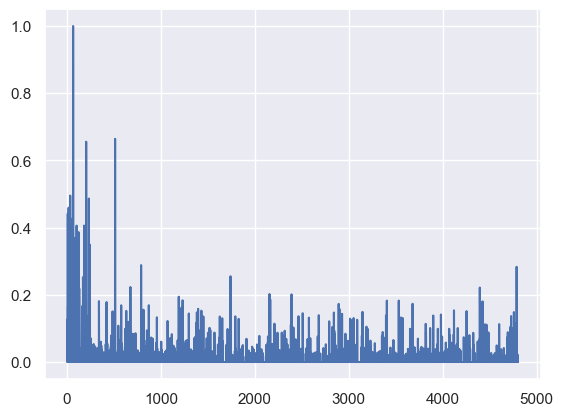

In [40]:
plt.plot(sim)

In [41]:
# Sort the array using the indices. Reverse the sorted array
sim.argsort(), (-sim).argsort()

(array([2401, 3112, 3113, ...,  203,  511,   64]),
 array([  64,  511,  203, ..., 1870, 1855, 4802]))

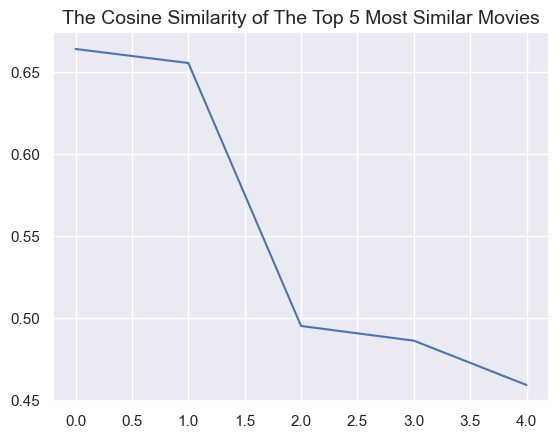

In [42]:
plt.plot(sim[(-sim).argsort()[1:6]])
plt.title("The Cosine Similarity of The Top 5 Most Similar Movies", size=14)
plt.show()

In [43]:
# Get the indices of the top 5 most similar movies.
# Slice from 1 to avoid selecting the actual queried movie.
rec_idx = (-sim).argsort()[1:6]
rec_idx

array([511, 203,  33, 232,  16])

In [44]:
# Display the recommended movies
movie_2_idx.iloc[rec_idx]

title
X-Men                    511
X2                       203
X-Men: The Last Stand     33
The Wolverine            232
The Avengers              16
dtype: int64

In [48]:
def preprocess_data(*, db: pd.DataFrame) -> pd.DataFrame:
    """This is used to prepare the data."""
    db = db.copy()
    columns = ["genres", "keywords", "title"]
    db = db[columns]  # Select relevant columns
    # Preprocess data
    db = db.assign(
        genres=lambda x: x["genres"].apply(extract_values),
        keywords=lambda x: x["keywords"].apply(extract_values),
    )

    db = db.assign(
        preprocessed_feature=db.apply(
            lambda x: concat_columns(x["genres"], x["keywords"]), axis="columns"
        )
    )

    return db


def get_tfidf(*, cleaned_data: pd.DataFrame, max_features: int) -> np.ndarray:
    """This calculates the tf-idf of the data."""
    feature = cleaned_data.columns[-1]
    tfidf = TfidfVectorizer(stop_words="english", max_features=max_features)
    X_tr = tfidf.fit_transform(cleaned_data[feature])
    return X_tr


def get_movie_index_series(*, db: pd.DataFrame) -> pd.Series:
    """This resturns a Pandas Series containing the index of the movies
    and the movie titles."""
    index_series = pd.Series(db.index, index=db["title"])
    return index_series


def select_n_movies(
    *, index_series: pd.Series, similarity: np.ndarray, n: int = 5
) -> list:
    """This selects the `n` top movies."""
    # Select the movies and convert to a list
    result = index_series.iloc[(-similarity).argsort()[1 : n + 1]].index
    result = list(result)
    return result

In [49]:
def movie_recommender(*, db: pd.DataFrame, movie_title: str) -> list:
    """This returns a list of 5 most similar movies."""
    processed_data = preprocess_data(db=db)
    X_tfidf = get_tfidf(cleaned_data=processed_data, max_features=5_000)
    # Obtain Series containing movie index and movie titles
    index_series = get_movie_index_series(db=processed_data)
    query_idx = index_series.loc[movie_title]  # Index of the queried movie
    # Calculate TFIDF of queried movie
    query_tfidf = X_tfidf[query_idx]
    # Calculate similarity
    similarity = cosine_similarity(X=query_tfidf, Y=X_tfidf)
    # Flatten the similarity (i.e convert to 1-D)
    similarity = similarity.flatten()
    rec_movies = select_n_movies(index_series=index_series, similarity=similarity, n=5)
    return {"recommended_movies": rec_movies}

In [50]:
movie_title = "John Carter"

movie_recommender(db=movies_db, movie_title=movie_title)

{'recommended_movies': ['Spaced Invaders',
  'My Favorite Martian',
  'The Last Days on Mars',
  'Guiana 1838',
  'Mission to Mars']}